In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms


In [2]:
data = pd.read_csv('../input/consumer-complaint-classification/Consumer_Complaints.csv')
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/14,Closed with explanation,Yes,No,759217
1,10/1/16,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/16,Closed with explanation,Yes,No,2141773
2,10/17/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/16,Closed with explanation,Yes,No,2163100
3,6/8/14,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/14,Closed with explanation,Yes,Yes,885638
4,9/13/14,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/14,Closed with explanation,Yes,Yes,1027760


In [3]:
data.shape

(9999, 18)

Date received                      0
Product                            0
Sub-product                     3053
Issue                              0
Sub-issue                       5847
Consumer Complaint              7885
Company Public Response         7305
Company                            0
State                             86
ZIP code                          86
Tags                            8588
Consumer consent provided?      5994
Submitted via                      0
Date Sent to Company               0
Company Response to Consumer       0
Timely response?                   0
Consumer disputed?               156
Complaint ID                       0
dtype: int64


<AxesSubplot:>

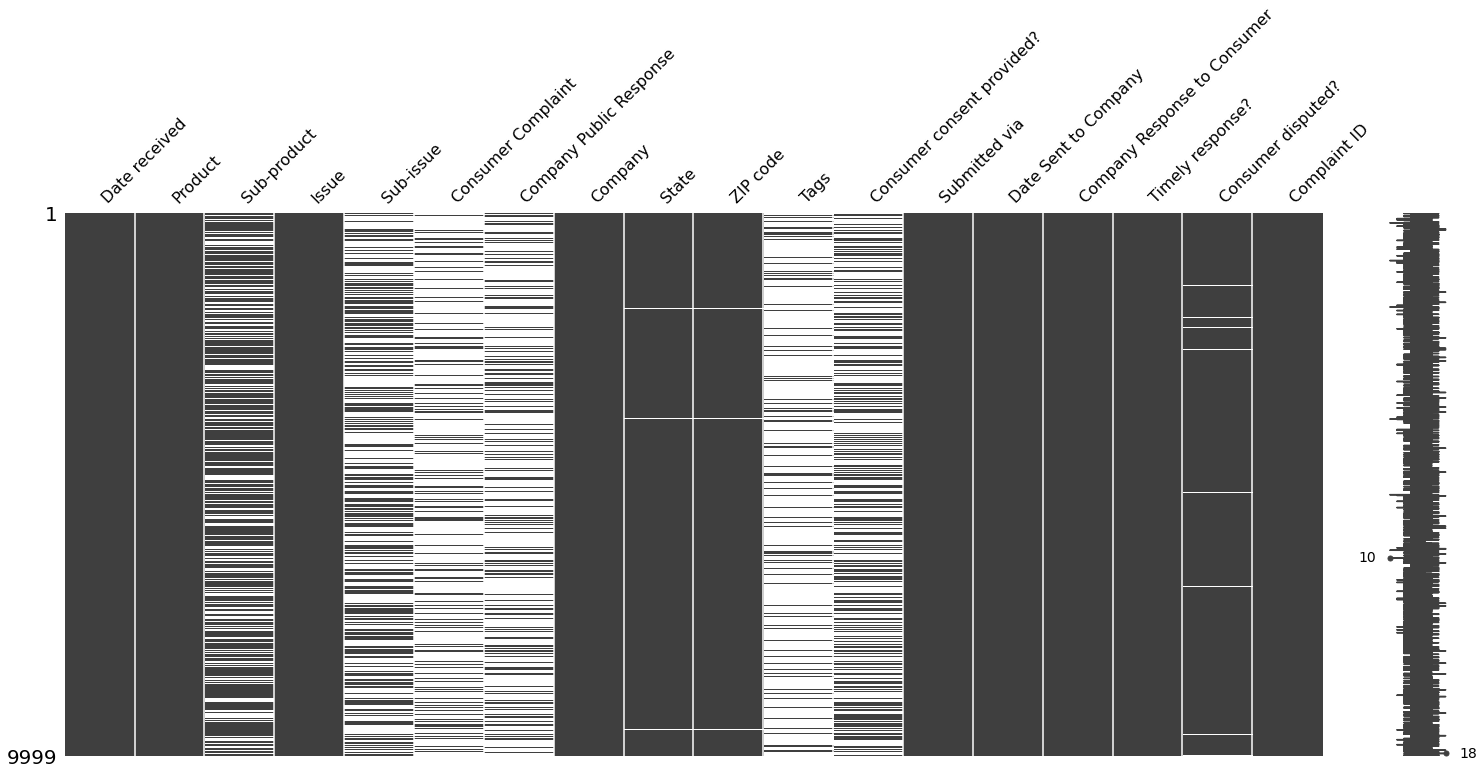

In [4]:
print(data.isnull().sum())
ms.matrix(data)

In [5]:
data['Sub-product'].mode()

0    Other mortgage
dtype: object

In [6]:
#i am going to drop unneccessory columns because they dont have any importance 

In [7]:
# we are going to work only with product and consumer complaint because thats what we needed
new_data = data[['Product','Consumer Complaint']]
new_data.head()

,Product,Consumer Complaint
0,Mortgage,NaN
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
3,Credit card,NaN
4,Debt collection,NaN


In [8]:
new_data.Product.value_counts()

Mortgage                                                                        2919
Debt collection                                                                 1904
Credit reporting                                                                1821
Credit card                                                                     1162
Bank account or service                                                         1090
Student loan                                                                     422
Consumer Loan                                                                    393
Money transfers                                                                   71
Payday loan                                                                       70
Credit reporting, credit repair services, or other personal consumer reports      59
Prepaid card                                                                      45
Other financial service                                          

In [9]:
new_data = new_data[pd.notnull(new_data['Consumer Complaint'])]
new_data.shape

(2114, 2)

In [10]:
new_data['category_id'] = new_data['Consumer Complaint'].factorize()[0]
new_data.head()

,Product,Consumer Complaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,2
12,Debt collection,This company refuses to provide me verificatio...,3
16,Debt collection,This complaint is in regards to Square Two Fin...,4


In [11]:
cat_id = new_data[['Product', 'category_id']].drop_duplicates().sort_values('category_id')

In [12]:
cat_to_id = dict((cat_id.values))
id_to_cat = dict(cat_id[['category_id','Product']].values)
new_data.head()
#new_data.shape

,Product,Consumer Complaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,2
12,Debt collection,This company refuses to provide me verificatio...,3
16,Debt collection,This complaint is in regards to Square Two Fin...,4


<AxesSubplot:xlabel='Product'>

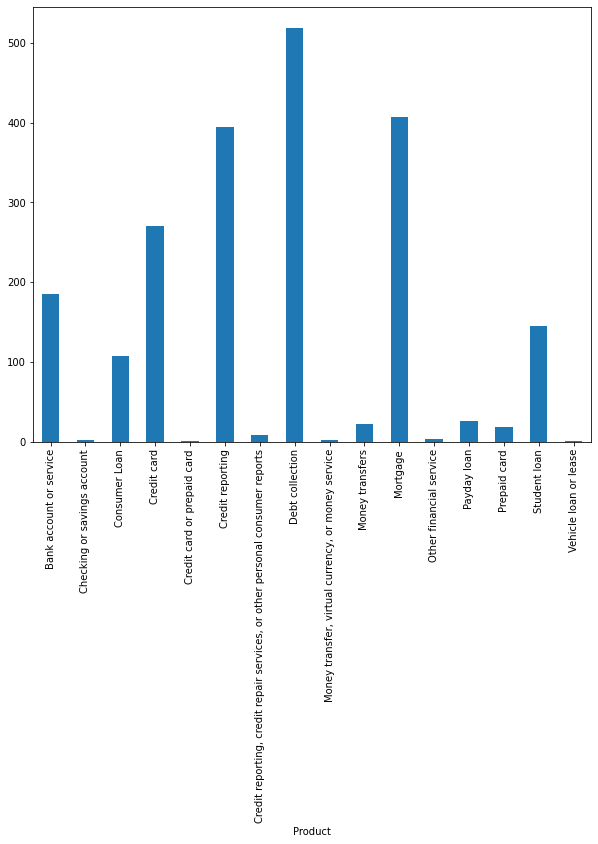

In [13]:
fig =plt.figure(figsize =(10,8))

new_data.groupby('Product')['Consumer Complaint'].count().plot.bar(ylim=0)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(sublinear_tf =True, min_df = 5,norm ='l2' , ngram_range =(1,2), stop_words ='english')
features = tfid.fit_transform(new_data['Consumer Complaint']).toarray()

labels = new_data.category_id


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_data['Consumer Complaint'], new_data['Product'],random_state =0)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()


In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
count_train  =count.fit_transform(x_train)
count_test = count.transform(x_test)

tfid_transform = TfidfTransformer()
tdif_train = tfid_transform.fit_transform(count_train)
tdif_test = tfid_transform.fit_transform(count_test)

In [18]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(tdif_train,y_train)
predict = clf.predict(tdif_test)


In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test,predict))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.60      0.73      0.66        44
                                                               Consumer Loan       0.42      0.24      0.30        21
                                                                 Credit card       0.77      0.74      0.75        72
                                                            Credit reporting       0.79      0.89      0.84        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.78      0.86      0.82       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.pipeline import Pipeline 

text_clf = Pipeline([('tf' ,TfidfVectorizer(sublinear_tf =True, min_df = 5,norm ='l2' , ngram_range =(1,2), stop_words ='english')),
                     ('clf',LinearSVC())])

In [21]:
text_clf.fit(x_train,y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', LinearSVC())])

In [22]:
predict_text = text_clf.predict(x_test)

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score = cross_val_score(text_clf , x_train,y_train,cv=5,scoring ='accuracy',n_jobs =-1)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [24]:
print(np.mean(cross_val_score))

0.7936908517350157


In [25]:
from sklearn.naive_bayes import BernoulliNB
nb =BernoulliNB


text_clf = Pipeline([('tf' ,TfidfVectorizer(sublinear_tf =True, min_df = 5,norm ='l2' , ngram_range =(1,2), stop_words ='english')),
                     ('clf',BernoulliNB())])

In [26]:
text_clf.fit(x_train, y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', BernoulliNB())])

In [27]:
predict = text_clf.predict(x_test)
print(metrics.classification_report(y_test,predict))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.71      0.55      0.62        44
                                                               Consumer Loan       0.50      0.14      0.22        21
                                                                 Credit card       0.69      0.60      0.64        72
                                                            Credit reporting       0.60      0.92      0.73        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.63      0.84      0.72       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(text_clf, x_train, y_train, cv=5, scoring ="accuracy", n_jobs = -1)
print(np.mean(cross_val))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.6580441640378549


In [29]:
from sklearn.tree import DecisionTreeClassifier
text_clf = Pipeline([('tf' ,TfidfVectorizer(sublinear_tf =True, min_df = 5,norm ='l2' , ngram_range =(1,2), stop_words ='english')),
                     ('clf',DecisionTreeClassifier())])
text_clf.fit(x_train,y_train)


Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', DecisionTreeClassifier())])

In [30]:
predict = text_clf.predict(x_test)

model_score = text_clf.score(x_test,y_test)
print('model score',model_score)

cross_val = cross_val_score(text_clf, x_train,y_train, cv =5 ,scoring ='accuracy',n_jobs =-1)
print('cross val score ',np.mean(cross_val))

model score 0.6313799621928167


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


cross val score  0.6157728706624606


In [31]:
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([('tf' ,TfidfVectorizer(sublinear_tf =True, min_df = 5,norm ='l2' , ngram_range =(1,2), stop_words ='english')),
                     ('clf',RandomForestClassifier())])
text_clf.fit(x_train,y_train)



Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', RandomForestClassifier())])

In [32]:
predict = text_clf.predict(x_test)

model_score = text_clf.score(x_test,y_test)
print('model score',model_score)

cross_val = cross_val_score(text_clf, x_train,y_train, cv =5 ,scoring ='accuracy',n_jobs =-1)
print('cross val score ',np.mean(cross_val))

model score 0.77882797731569


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


cross val score  0.7470031545741325


In [33]:
from lightgbm import LGBMClassifier 

text_clf = Pipeline([('tf' ,TfidfVectorizer(sublinear_tf =True, min_df = 5,norm ='l2' , ngram_range =(1,2), stop_words ='english')),
                     ('clf',RandomForestClassifier())])
text_clf.fit(x_train,y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', RandomForestClassifier())])

In [34]:
predict = text_clf.predict(x_test)
print(metrics.classification_report(y_test,predict))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.76      0.73      0.74        44
                                                               Consumer Loan       0.60      0.14      0.23        21
                                                                 Credit card       0.76      0.81      0.78        72
                                                            Credit reporting       0.78      0.84      0.80        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.69      0.90      0.78       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
predict = text_clf.predict(x_test)

model_score = text_clf.score(x_test,y_test)
print('model score',model_score)

cross_val = cross_val_score(text_clf, x_train,y_train, cv =5 ,scoring ='accuracy',n_jobs =-1)
print('cross val score ',np.mean(cross_val))

model score 0.7731568998109641


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


cross val score  0.7488958990536277


hyperparameter tuning

In [36]:
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV

n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6) ]
min_samples_split =[2,5,10,15,100]
min_samples_leaf = [1,2,5,10]


search_grid ={'n_estimators': n_estimators, 'max_features': max_features ,
             'max_depth': max_depth, 'min_samples_split': min_samples_split,
             'min_samples_leaf' : min_samples_leaf}


In [37]:
#random forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf =RandomizedSearchCV(estimator = rf, param_distributions = search_grid, cv =5, scoring ='accuracy',n_iter = 10,n_jobs =-1)

rf.fit(tdif_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='accuracy')

In [38]:
rf.best_score_

0.722397476340694

In [39]:
rf.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}